<a href="https://colab.research.google.com/github/leeno-ob/IT326-project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2 - IT326Project

## Data Analysis

Exam_Score (Five-Number Summary + Outliers)

The numeric attribute Exam_Score is summarized using the five-number summary and IQR to detect outliers. A boxplot is used to visualize the distribution and identify extreme values.

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

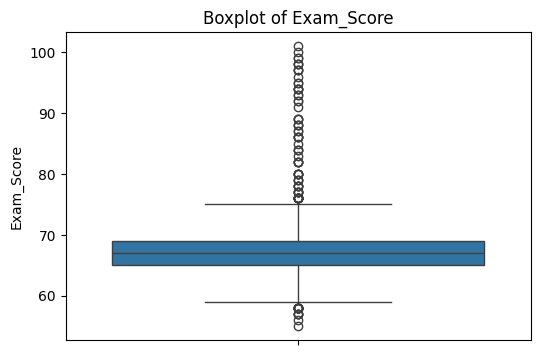

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/leeno-ob/IT326-project/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)


print(df.head())

print("Statistical Summary (df.describe()):")
print(df.describe())

col_name = "Exam_Score"
col = df[col_name]

minimum = col.min()
maximum = col.max()
median  = col.median()

# Quartiles
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)

print("\nFive-Number Summary for", col_name)
print("Min   =", minimum)
print("Q1    =", Q1)
print("Median=", median)
print("Q3    =", Q3)
print("Max   =", maximum)

# IQR
IQR = Q3 - Q1
print("\nIQR =", IQR)

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
print("\nNumber of Outliers =", len(outliers))

outliers[[col_name]].head()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=df[col_name])
plt.title("Boxplot of " + col_name)
plt.ylabel(col_name)
plt.show()



###Exam_Score

From the results, we can see that most exam scores are between 65 and 69, since the median is 67.
The IQR is 4, which means the data is not very spread out in the middle range.
However, there are many outliers (104 values), which appear clearly in the boxplot above 75 and below 59.
This means some students scored much higher or lower than the majority.

Hours_Studied (Five-Number Summary + Outliers)

The numeric attribute Hours_Studied is summarized using the five-number summary and IQR to detect outliers. A boxplot is used to visualize the distribution and identify extreme values.


Five-Number Summary for Hours_Studied
Min   = 1
Q1    = 16.0
Median= 20.0
Q3    = 24.0
Max   = 44

IQR = 8.0
Lower Bound = 4.0
Upper Bound = 36.0
Number of Outliers = 43


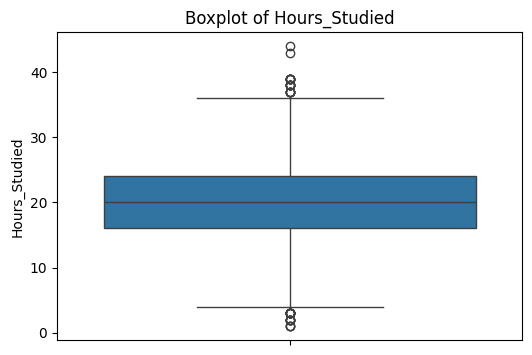

In [ ]:

col_name = "Hours_Studied"
col = df[col_name]

minimum = col.min()
maximum = col.max()
median  = col.median()

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)

print("\nFive-Number Summary for", col_name)
print("Min   =", minimum)
print("Q1    =", Q1)
print("Median=", median)
print("Q3    =", Q3)
print("Max   =", maximum)

# IQR
IQR = Q3 - Q1
print("\nIQR =", IQR)

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
print("Number of Outliers =", len(outliers))

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=df[col_name])
plt.title("Boxplot of " + col_name)
plt.ylabel(col_name)
plt.show()

Hours_Studied

The median number of study hours is 20 hours.
Most students studied between 16 and 24 hours (Q1 to Q3).
The IQR is 8, so the spread is a bit larger compared to Exam_Score.
There are 43 outliers, which means some students studied much less or much more than the typical range.

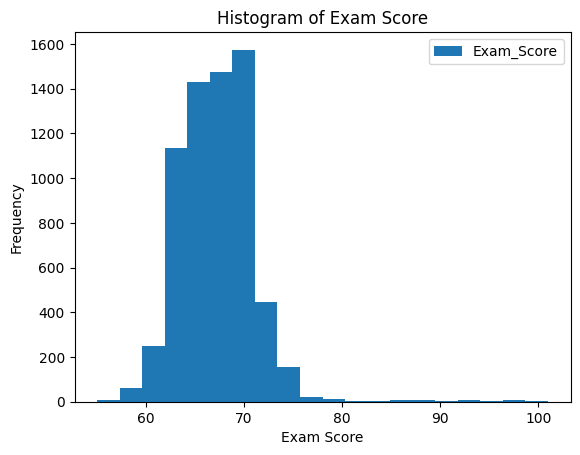

In [ ]:
df.plot.hist(column='Exam_Score', bins=20)
plt.title("Histogram of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()


This histogram shows the distribution of exam scores.
It helps in understanding how the scores are spread across the dataset and whether the distribution is skewed.
This information is useful to determine if preprocessing techniques such as normalization or discretization are needed.

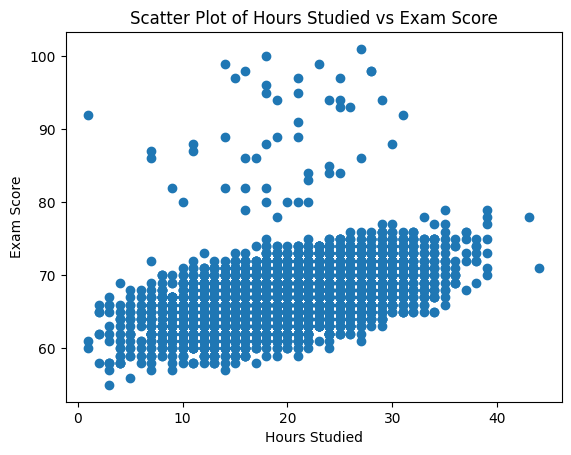

In [ ]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Scatter Plot of Hours Studied vs Exam Score")
plt.show()

This scatter plot shows the relationship between hours studied and exam score.
It helps in identifying whether there is a correlation between the two variables.
Understanding this relationship is useful in determining which attributes may be important for further analysis.

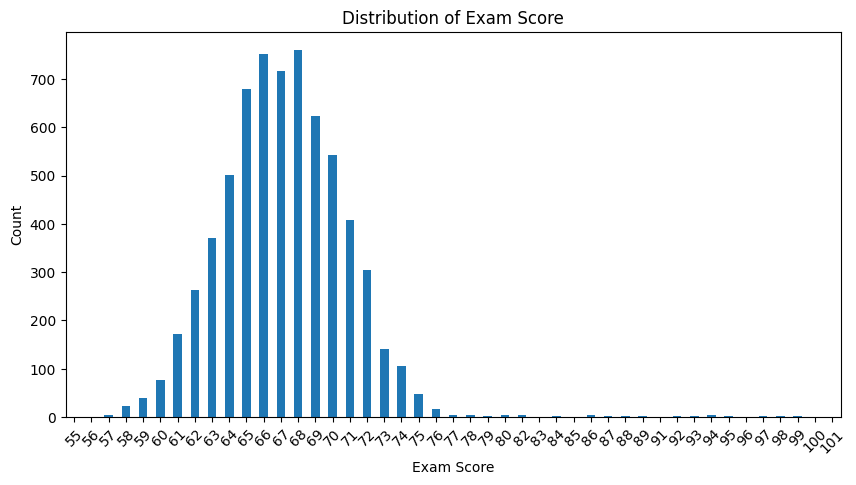

In [ ]:
import matplotlib.pyplot as plt

counts = df['Exam_Score'].value_counts().sort_index()

plt.figure(figsize=(10,5))
counts.plot(kind='bar')

plt.xticks(rotation=45)
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Count")

plt.show()

This bar plot shows how frequently each exam score appears in the dataset.
The distribution is not evenly balanced, which may affect modeling and may require preprocessing.

### Missing Values

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Some columns contain missing values which are Teacher_Quality, Parental_Education_Level, and Distance_from_Home, those missing values should be handled using appropriate preprocessing techniques before modeling.


### Class Distribution

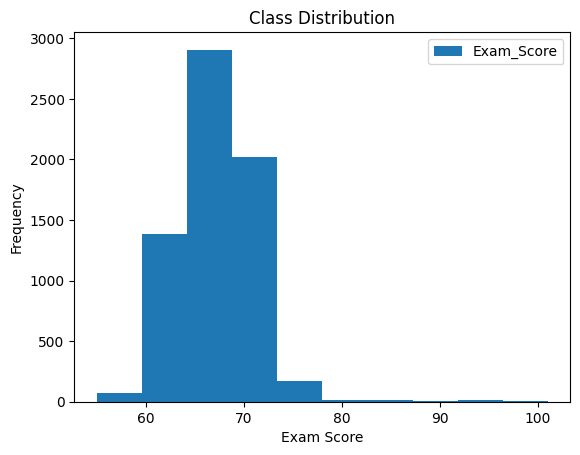

In [ ]:
df.plot.hist(column='Exam_Score', bins=10)
plt.title("Class Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

The histogram shows that most students have average scores, and very high scores are less common. Because the distribution is not perfectly balanced, some preprocessing techniques may be needed.

# Data Preprocessing

## Handling Missing Value

Missing values handling is the process of treating incomplete data entries to ensure dataset consistency.

### Why applied :

A small number of missing values were detected in some categorical attributes. Leaving them untreated may affect data quality and model performance. Since the percentage was very low, filling them was more appropriate than removing rows.


### How applied:

Missing values were replaced using the mode (most frequent value) of each column to maintain consistency without significantly altering the dataset.

In [ ]:
df_preprocessed = df.copy()

cat_missing_cols = ["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]

for col in cat_missing_cols:
    mode_value = df_preprocessed[col].mode()[0]
    print(f"Mode used for {col}: {mode_value}")
    df_preprocessed[col] = df_preprocessed[col].fillna(mode_value)

Mode used for Teacher_Quality: Medium
Mode used for Parental_Education_Level: High School
Mode used for Distance_from_Home: Near


Since the percentage of  missing values was very small, replacing them with the mode helps keep the data consistent without changing it too much.  

### On which attributes:

* Teacher_Quality
* Parental_Education_Level
* Distance_from_Home





### Handling missing values Results:


Missing values were replaced using the most frequent value of each attribute (Medium, High School, and Near), ensuring data completeness without significantly changing the dataset.

## Noise Removal

Noise removal is the process of identifying and correcting unrealistic or incorrect values in the dataset.

### Why applied:

During data inspection, an unrealistic value (Exam_Score = 101) was detected. Since exam scores logically range between 0 and 100, this value was considered noise. Keeping such incorrect values may distort statistical analysis and negatively affect model performance.

In [ ]:

invalid_scores = df_preprocessed[
    (df_preprocessed["Exam_Score"] < 0) |
    (df_preprocessed["Exam_Score"] > 100)
]

print("Number of invalid scores:", len(invalid_scores))
invalid_scores[["Exam_Score"]]

Number of invalid scores: 1


,Exam_Score
1525,101


### How applied:


The dataset was checked for values outside the valid score range (0–100). Any detected out-of-range values were either corrected or removed to ensure data consistency.

In [ ]:
df_preprocessed = df_preprocessed[
    (df_preprocessed["Exam_Score"] >= 0) &
    (df_preprocessed["Exam_Score"] <= 100)
]

invalid_scores_after = df_preprocessed[
    (df_preprocessed["Exam_Score"] < 0) |
    (df_preprocessed["Exam_Score"] > 100)
]

print("Invalid scores after Noise removal:", len(invalid_scores_after))

Invalid scores after Noise removal: 0


### On which attributes:


Exam_Score

### Noise Removal Results:


After analyzing the dataset, one invalid exam score value greater than 100 was detected.
This value was removed since exam scores should logically range between 0 and 100.
After noise removal, all remaining exam scores fall within a valid range, which improved data accuracy and reliability.

## Discretization

Discretization is the process of transforming continuous numerical values into categorical groups.

### Why applied:

The exam scores were divided into three performance levels (Low, Medium, High) to simplify the continuous values into meaningful groups. Continuous numerical scores can be difficult to interpret when they contain many distinct values. By grouping them into predefined ranges, the data becomes more structured and easier to analyze and compare.

### How applied:

The continuous Exam_Score values were grouped into three performance categories using predefined score intervals: scores below 60 were classified as “Low”, scores between 60 and 79 as “Medium”, and scores 80 or above as “High”.

Performance_Level
Low       1452
Medium    3530
High      1625
Name: count, dtype: int64


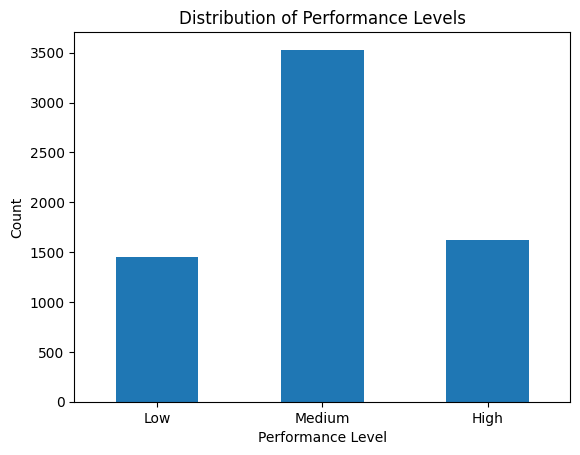

In [ ]:
import matplotlib.pyplot as plt

def categorize(score):
    if score <= 64:
        return "Low"
    elif score <= 69:
        return "Medium"
    else:
        return "High"

df_preprocessed["Performance_Level"] = df_preprocessed["Exam_Score"].apply(categorize)

order = ["Low", "Medium", "High"]
counts = df_preprocessed["Performance_Level"].value_counts().reindex(order)

print(counts)

counts.plot(kind="bar")

plt.title("Distribution of Performance Levels")
plt.xlabel("Performance Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### On which attributes:

Exam_Score

### Discretization Results:


The exam scores were discretized into three categories: Low, Medium, and High.
The results show that most students fall into the Medium performance level, while fewer students are classified as Low or High.
This indicates that the majority of students have average performance, and discretization helped reveal the overall performance distribution more clearly.


## Encoding

Encoding is the process of converting categorical values into numerical format so they can be used in data mining and machine learning tasks.

### Why applied:

Encoding was applied because the dataset contains categorical text attributes that cannot be processed directly in most data mining and machine learning algorithms. Converting them into numerical format ensures that all features can be interpreted mathematically during analysis.

### How applied:

Ordinal categorical variables were converted using predefined numerical mappings that reflect their natural order (e.g Low = 0, Medium = 1, High = 2).
Binary variables (Yes/No) were mapped to 1 and 0.

In [ ]:
df_preprocessed = df.copy()

cols_to_normalize = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Teacher_Quality",
    "Family_Income",
    "Distance_from_Home",
    "Internet_Access",
    "Extracurricular_Activities",
    "Learning_Disabilities",
    "Peer_Influence",
    "Parental_Education_Level",
    "Gender",
    "School_Type"
]

for col in cols_to_normalize:
    if col in df_preprocessed.columns:
        df_preprocessed[col] = (
            df_preprocessed[col]
            .astype("string")
            .str.strip()
            .str.lower()
        )

ordinal_mapping = {
    "low": 0, "medium": 1, "high": 2,
    "near": 0, "moderate": 1, "far": 2
}

yes_no_mapping = {"yes": 1, "no": 0}
peer_mapping = {"negative": 0, "neutral": 1, "positive": 2}
edu_mapping = {"high school": 0, "college": 1, "postgraduate": 2}
gender_mapping = {"male": 0, "female": 1}
school_mapping = {"public": 1, "private": 0}

ordinal_columns = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Teacher_Quality",
    "Family_Income",
    "Distance_from_Home"
]

yes_no_columns = [
    "Internet_Access",
    "Extracurricular_Activities",
    "Learning_Disabilities"
]

for col in ordinal_columns:
    if col in df_preprocessed.columns:
        df_preprocessed[col] = df_preprocessed[col].map(ordinal_mapping)

for col in yes_no_columns:
    if col in df_preprocessed.columns:
        df_preprocessed[col] = df_preprocessed[col].map(yes_no_mapping)

if "Peer_Influence" in df_preprocessed.columns:
    df_preprocessed["Peer_Influence"] = df_preprocessed["Peer_Influence"].map(peer_mapping)

if "Parental_Education_Level" in df_preprocessed.columns:
    df_preprocessed["Parental_Education_Level"] = df_preprocessed["Parental_Education_Level"].map(edu_mapping)

if "Gender" in df_preprocessed.columns:
    df_preprocessed["Gender"] = df_preprocessed["Gender"].map(gender_mapping)

if "School_Type" in df_preprocessed.columns:
    df_preprocessed["School_Type"] = df_preprocessed["School_Type"].map(school_mapping)

df_preprocessed = df_preprocessed.drop(
    columns=["Gender_Male", "School_Type_Public"],
    errors="ignore"
)

for col in df_preprocessed.columns:
    if df_preprocessed[col].isnull().any():
        mode_val = df_preprocessed[col].mode().iloc[0]
        df_preprocessed[col] = df_preprocessed[col].fillna(mode_val)

print(df_preprocessed.head())
print(df_preprocessed.dtypes)

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_

### On which attributes:

* Parental_Involvement
* Access_to_Resources
* Motivation_Level
* Teacher_Quality
* Family_Income
* Gender
* Distance_from_Home
* Internet_Access
* Extracurricular_Activities
* Learning_Disabilities
* Peer_Influence
* Parental_Education_Level

### Encoding Results:


After applying encoding, all categorical attributes were successfully converted into numerical values. As a result, the dataset no longer contains textual data, and all features are now represented in a numeric format suitable for further analysis and model training.



## Normalization

Min-Max normalization is a feature scaling technique that rescales numerical values to a fixed range.




### Why applied :

The Attendance values range between 60 and 100, which is relatively large compared to other features that may range between 0–5 or 0–10. When features have different numerical scales, attributes with larger values can dominate the learning process. This may bias the model toward such features simply because of their magnitude, not their importance. Therefore, normalization is required to make the feature comparable to others and to prevent scale imbalance during model training.

### Before Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col = "Attendance"

print("Before Normalization:")
print("Min:", df_preprocessed[col].min())
print("Max:", df_preprocessed[col].max())

df_preprocessed[[col]].head(5)

Before Normalization:
Min: 60
Max: 100


,Attendance
0,84
1,64
2,98
3,89
4,92


### How applied :

Min-Max normalization was implemented using MinMaxScaler, which proportionally transforms each value based on the minimum and maximum of the feature. As a result, the smallest value becomes 0, the largest becomes 1, and all other values are scaled between them while preserving the original distribution pattern.

### Applying Normalization

In [ ]:
scaler = MinMaxScaler()

df_scaled = df_preprocessed.copy()
df_scaled[col] = scaler.fit_transform(df_preprocessed[[col]])

print("After Normalization:")
print("Min:", df_scaled[col].min())
print("Max:", df_scaled[col].max())

df_scaled[[col]].head(5)

After Normalization:
Min: 0.0
Max: 1.0


,Attendance
0,0.600
1,0.100
2,0.950
3,0.725
4,0.800


### On which attributes:

Min-Max normalization was applied to the Attendance attribute.



### Normalization Results:


After applying Min–Max normalization, the Attendance values were successfully rescaled to a range between 0 and 1. This reduced the scale difference between Attendance and other features, making the dataset more balanced and suitable for fair comparison during model training.

## Removing Attributes

### Why applied:

Exam_Score was removed because a new categorical variable (Performance_Level) was created from it. Keeping both variables would cause redundancy.

### How applied:

The column was dropped using the drop() function.

In [ ]:
df_fs = df_preprocessed.drop(columns=["Exam_Score"])

print("Columns after removing Exam_Score:")
print(df_fs.columns)

Columns after removing Exam_Score:
Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')


### On which attribute:

Exam_Score.

## Removing Attributes Results:
After removing the Exam_Score attribute, the dataset became more concise and free of redundancy. Since Performance_Level was already derived from Exam_Score, keeping both was unnecessary. Removing it simplified the dataset while preserving all relevant information for analysis and modeling.


## Feature Selection (Variance Threshold)

### Why applied:

Variance Threshold was applied to detect and remove features with very low variance.
Features that barely change across records usually provide little useful information and may add noise.

### How applied:

The Variance Threshold method was applied on all predictor features.
A small threshold value was used to filter near-constant features.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

threshold_value = 0.01

X = df_preprocessed.drop(columns=["Performance_Level"])
y = df_preprocessed["Performance_Level"]

selector = VarianceThreshold(threshold=threshold_value)
X_selected = selector.fit_transform(X)

removed_cols = X.columns[~selector.get_support()]

print(f"Threshold: {threshold_value}")
print(f"Number of features removed: {len(removed_cols)}")


Threshold: 0.01
Number of features removed: 0


### On which attributes:

Variance Threshold was applied to all numerical predictor attributes in the dataset after excluding the target variable (Performance_Level). The method evaluated the variance of each feature to determine whether it met the minimum variability threshold.

## Feature Selection (Variance Threshold) Results:
No features were removed after applying the variance threshold, which indicates that all attributes have sufficient variability.

## Snapshot Raw Dataset (Before Preprocessing)

In [ ]:
df_raw = df.copy()
df_raw.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


## Snapshot Preprocessed Dataset (After Preprocessing)

In [ ]:
df_scaled.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,0.600,0,2,0,7,73,0,1,0,0,1.0,1,2,3,0,0.0,0.0,0,67
1,19,0.100,0,1,0,8,59,0,1,2,1,1.0,1,0,4,0,1.0,1.0,1,61
2,24,0.950,1,1,1,7,91,1,1,2,1,1.0,1,1,4,0,2.0,0.0,0,74
3,29,0.725,0,1,1,8,98,1,1,1,1,1.0,1,0,4,0,0.0,1.0,0,71
4,19,0.800,1,1,1,6,65,1,1,3,1,2.0,1,1,4,0,1.0,0.0,1,70
5,19,0.700,1,1,1,8,89,1,1,3,1,1.0,1,2,3,0,2.0,0.0,0,71
6,29,0.600,1,0,1,7,68,0,1,1,0,1.0,0,1,2,0,0.0,1.0,0,67
7,25,0.450,0,2,1,6,50,1,1,1,2,2.0,1,0,2,0,0.0,2.0,0,66
8,17,0.850,1,2,0,6,80,2,1,0,1,0.0,0,1,1,0,1.0,0.0,0,69
9,23,0.950,1,1,1,8,71,1,1,0,2,2.0,1,2,5,0,0.0,1.0,0,72


After preprocessing, we handled the missing values and normalized the numeric features using Min-Max scaling. This helped make the data more consistent and easier to use for building the model.

## Preprocessed Dataset Results:
The snapshot shows that after preprocessing, all features were converted into numerical form and normalized. Categorical variables were encoded into numeric values, and numerical features were scaled using Min–Max normalization. As a result, the dataset became more consistent, with values in comparable ranges, making it suitable for further analysis and model training.